In [220]:
# ! pip install yellowbrick

In [221]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")
np.random.seed(42)

In [222]:
# Reading the dataset

data = pd.read_csv("./marketing_campaign.csv",sep="\t")
print("Number of datapoints:", len(data))
data.head()

Number of datapoints: 2240


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [223]:
data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [224]:
 # DATA CLEANING

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [225]:
# We can see that Income column have null value inside it
# Dt_customer column needs to be converted into date type
# We need to encode the object type column into numerical values

In [226]:
# removing null values

data = data.dropna()
print("Number of datapoints now: ",len(data))

Number of datapoints now:  2216


In [227]:
# Finding the number of days customer is registered with the firm as it will be more beneficial then the date alone.

data["Dt_Customer"] = pd.to_datetime(data["Dt_Customer"], format = "%d-%m-%Y")


In [228]:
dates=[]
for i in data["Dt_Customer"]:
    a = i.date()
    dates.append(a)

print("The newest customer enrollment date in the records are: ",max(dates))
print("The oldest customer enrollment date in the records are: ",min(dates))

The newest customer enrollment date in the records are:  2014-06-29
The oldest customer enrollment date in the records are:  2012-07-30


In [229]:
# Creating a feature ("No_of_days") of the number of days the customers started to shop in the store relative to the last recorded date

days=[]
max_date = max(dates)
for i in dates:
    diff = max_date - i
    days.append(diff)
data["No_of_days"]=days
data["No_of_days"] = pd.to_numeric(data["No_of_days"], errors = "coerce")

In [230]:
# Exploring Categorical Variables

print("\nThe different value present in the categorical values are:\n")
print(data["Education"].value_counts(),"\n")

print(data["Marital_Status"].value_counts(),"\n")


The different value present in the categorical values are:

Education
Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: count, dtype: int64 

Marital_Status
Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64 



In [231]:
#Feature Engineering
data["Age"]=2024-data["Year_Birth"]

# Total Spending by the person
data["Total_spent"]=data["MntWines"]+data["MntFruits"]+data["MntMeatProducts"]+data["MntFishProducts"]+ data["MntSweetProducts"]+data["MntGoldProds"]

#Derving the martial status situation whether the person is living alone or with partner
data["Living_status"]=data["Marital_Status"].replace({"Married":"Couple","Together":"Couple","Divorced":"Single","Widow":"Single","Alone":"Single","Absurd":"Single","YOLO":"Single",})

#Creating child column to detect total number of children
data["Children"]= data["Teenhome"]+data["Kidhome"]

#Creating family size 
data["Family Size"]= data["Children"]+data["Living_status"].replace({"Couple":2,"Single":1})

#Feature Is_parent to describe parenthood status
data["Is_Parent"]=np.where(data.Children>0,1,0)

#Segmenting Education level in 3 groups
data["Education"]=data["Education"].replace({"Basic":"Undergraduate","2n Cycle":"Undergraduate", "Graduation":"Undergraduate", "Master":"Postgraduate", "PhD":"Postgraduate"})

#Renaming the attribute names
data=data.rename(columns={"MntWines": "Wines","MntFruits":"Fruits","MntMeatProducts":"Meat","MntFishProducts":"Fish","MntSweetProducts":"Sweets","MntGoldProds":"Gold"})

data=data.drop(["Marital_Status", "Dt_Customer", "Z_CostContact", "Z_Revenue", "Year_Birth", "ID"],axis=1)

In [232]:
data.describe()

,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,...,AcceptedCmp1,AcceptedCmp2,Complain,Response,No_of_days,Age,Total_spent,Children,Family Size,Is_Parent
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2.216000e+03,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,27.028881,43.965253,...,0.064079,0.013538,0.009477,0.150271,3.054423e+16,55.179603,607.075361,0.947202,2.592509,0.714350
std,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,41.072046,51.815414,...,0.244950,0.115588,0.096907,0.357417,1.749036e+16,11.985554,602.900476,0.749062,0.905722,0.451825
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000e+00,28.000000,5.000000,0.000000,1.000000,0.000000
25%,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,1.555200e+16,47.000000,69.000000,0.000000,2.000000,0.000000
50%,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,8.000000,24.500000,...,0.000000,0.000000,0.000000,0.000000,3.071520e+16,54.000000,396.500000,1.000000,3.000000,1.000000
75%,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000,...,0.000000,0.000000,0.000000,0.000000,4.570560e+16,65.000000,1048.000000,1.000000,3.000000,1.000000
max,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,...,1.000000,1.000000,1.000000,1.000000,6.039360e+16,131.000000,2525.000000,3.000000,5.000000,1.000000


In [233]:
#The above stats show some discrepancies in mean Income and Age and max Income and age.
# Do note that max-age is 131 years, As I calculated the age that would be today (i.e. 2024) and the data is old

Reletive Plot Of Some Selected Features: A Data Subset


<Figure size 800x550 with 0 Axes>

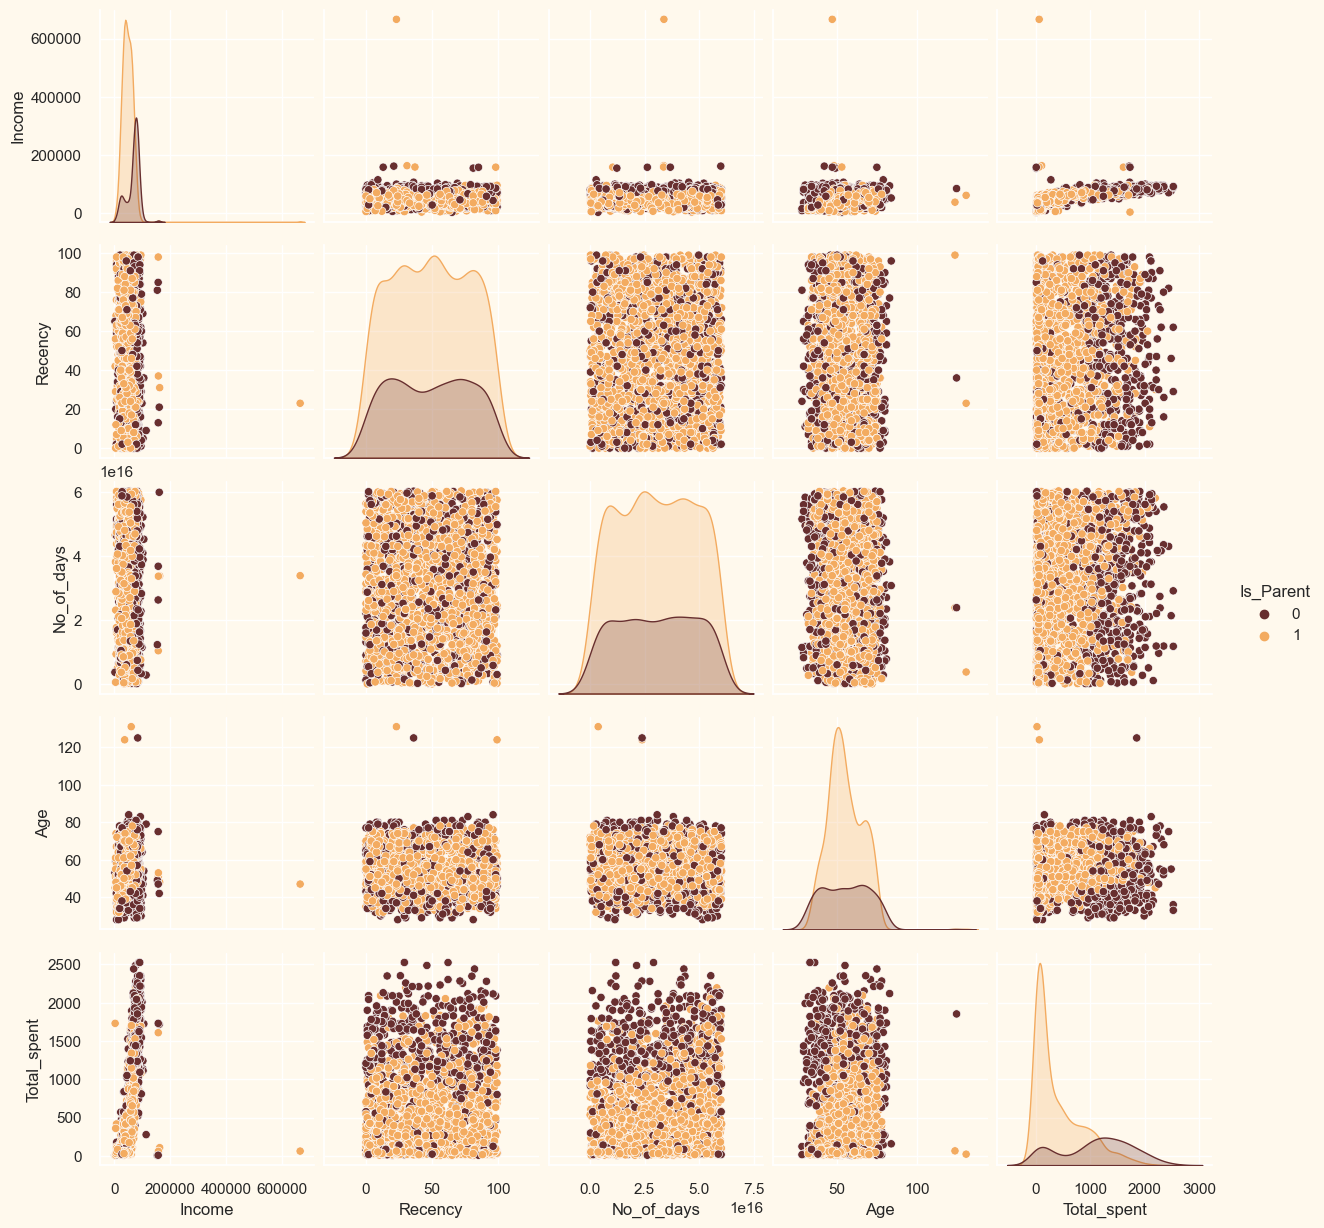

In [234]:
# Let's draw some of the selected features

sns.set(rc={"axes.facecolor":"#FFF9ED","figure.facecolor":"#FFF9ED"})
pallet = ["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"]
cmap = colors.ListedColormap(["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"])
#Plotting following features
To_Plot = [ "Income", "Recency", "No_of_days", "Age", "Total_spent", "Is_Parent"]
print("Reletive Plot Of Some Selected Features: A Data Subset")
plt.figure()
sns.pairplot(data[To_Plot], hue= "Is_Parent",palette= (["#682F2F","#F3AB60"]))
#Taking hue 
plt.show()

In [235]:
#Dropping the outliers by setting a cap on Age and income. 
data = data[(data["Age"]<90)]
data = data[(data["Income"]<600000)]
print("The total number of data-points after removing the outliers are:", len(data))

The total number of data-points after removing the outliers are: 2212


In [236]:
# DATA PREPROCESSING

In [237]:
# Converting Categorical variable to numeric
a = (data.dtypes == "object")
object_column = list(a[a].index)
print("Categorical variables in the dataset:", object_column)

Categorical variables in the dataset: ['Education', 'Living_status']


In [238]:
# Label Encoding to convert it into numeric variable
le = LabelEncoder()
for i in object_column:
    data[i]=data[[i]].apply(le.fit_transform)

print("ALl features are now numerical !!")

ALl features are now numerical !!


<Axes: >

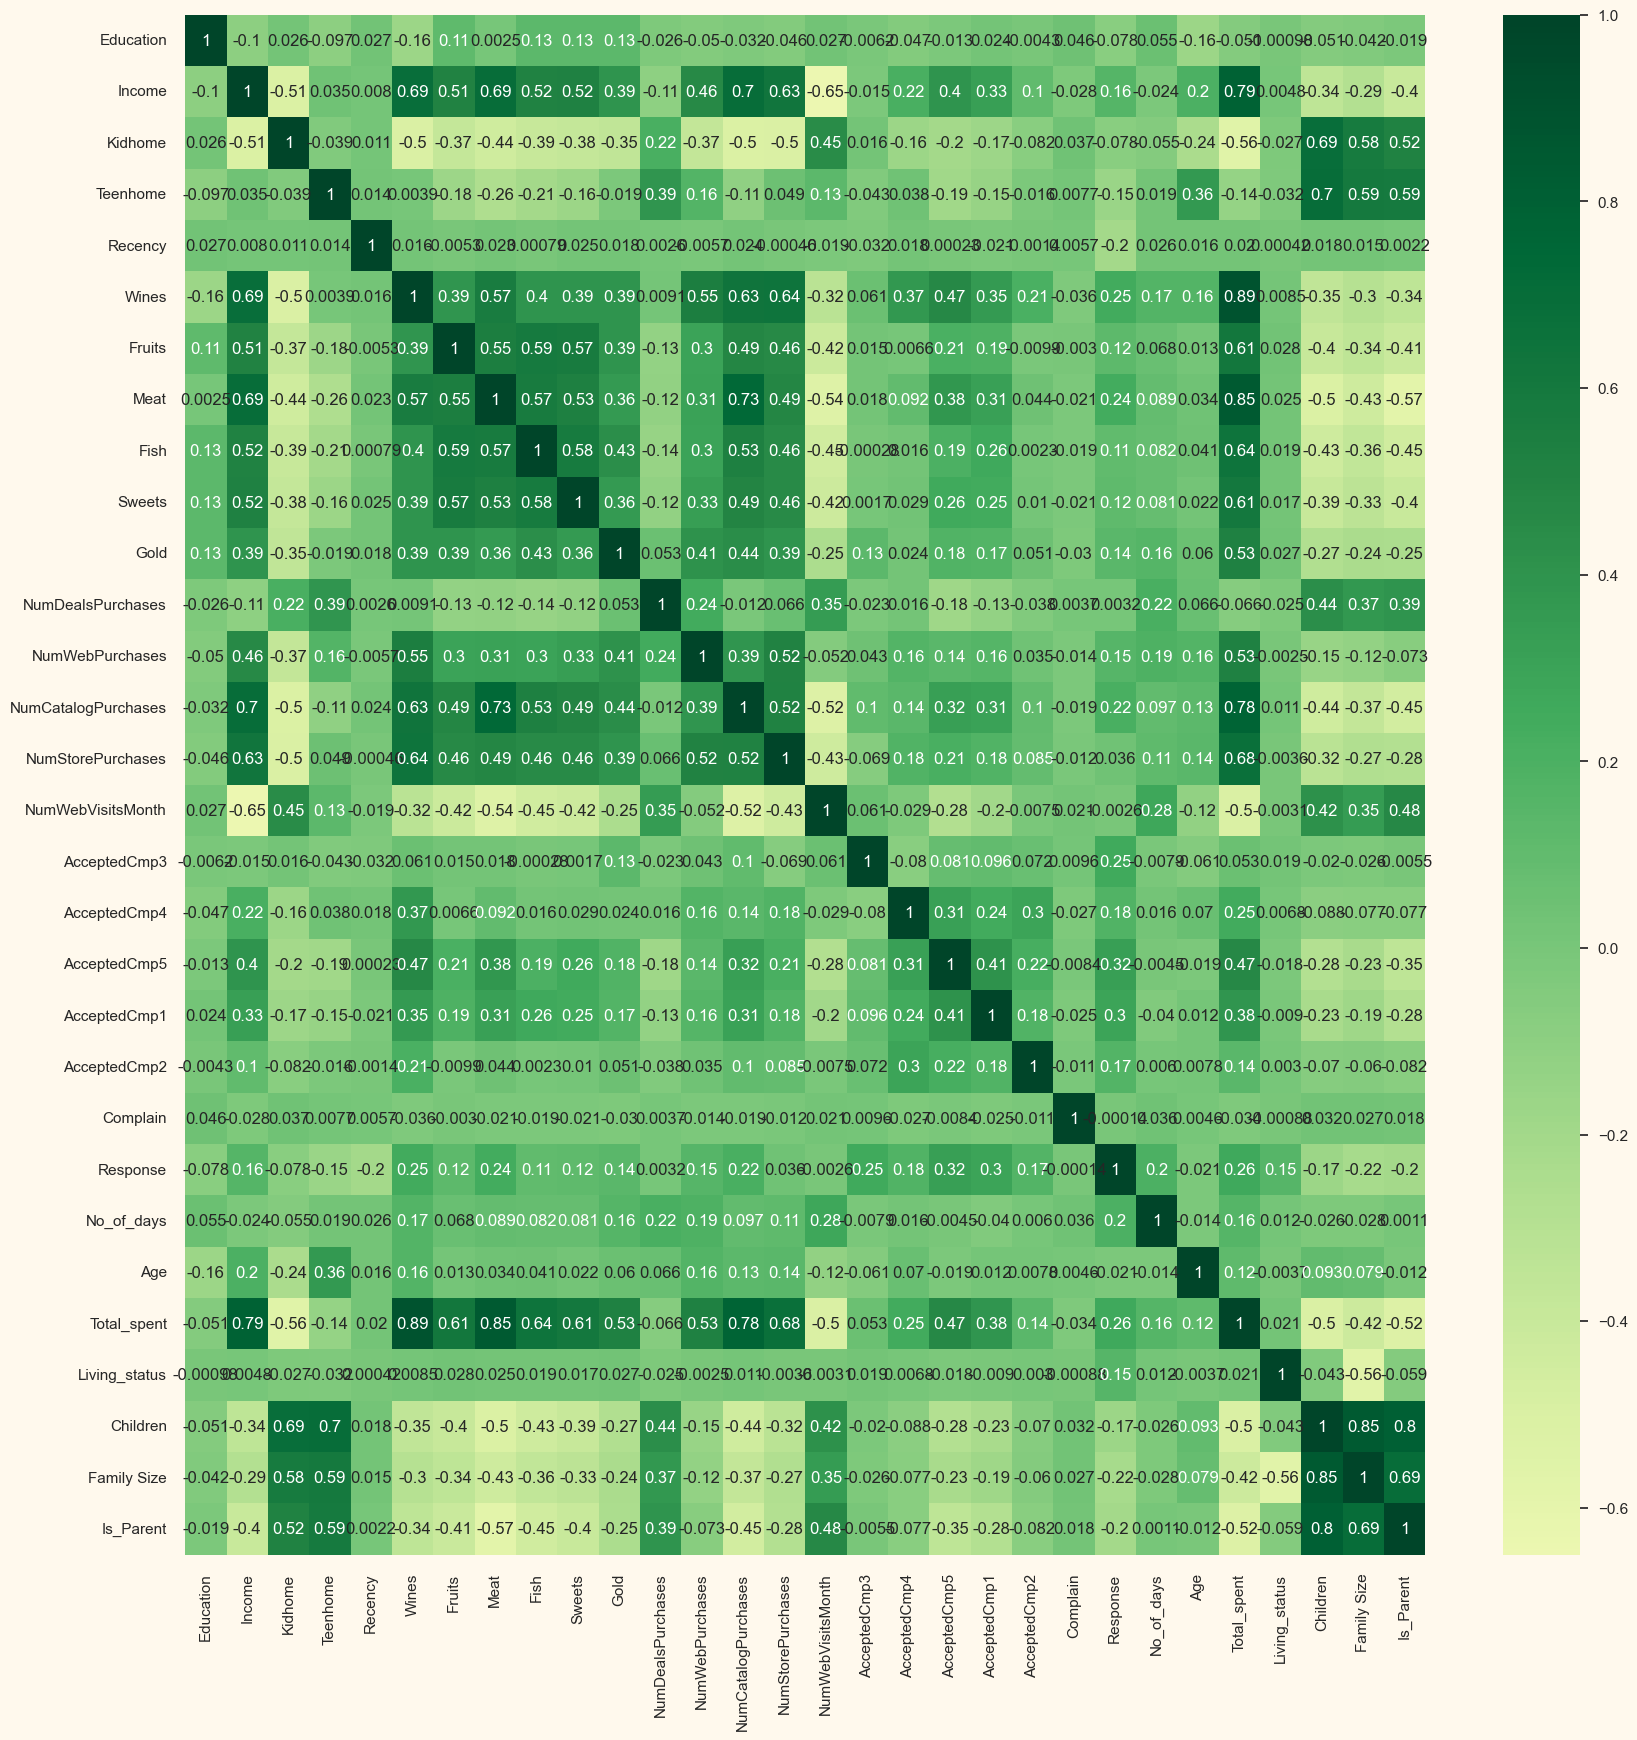

In [239]:
#Correlation matrix
corrmat = data.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corrmat,annot=True, cmap="YlGn", center=0)

In [240]:
# Creating a copy of data
df = data.copy()

# deleting some more columns
cols_del = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain', 'Response']
df = df.drop(cols_del, axis=1)

In [241]:
# Scaling the features value using StandardScalar
scalar = StandardScaler()
#scalar.fit(df)       -- fit() will find the mean and standard deviation and then transform will apply this to our dataframe but we can do this in a 
#                        single operation -- fit_transform()

In [242]:
scaled_df=pd.DataFrame(scalar.fit_transform(df), columns = df.columns)
print("All features are now scaled")

All features are now scaled


In [243]:
print("Dataframe to be used for further modelling:")
scaled_df.head()

Dataframe to be used for further modelling:


,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,No_of_days,Age,Total_spent,Living_status,Children,Family Size,Is_Parent
0,0.786220,0.287105,-0.822754,-0.929699,0.310353,0.977660,1.552041,1.690293,2.453472,1.483713,...,2.503607,-0.555814,0.692181,1.527721,1.018352,1.676245,1.349603,-1.264598,-1.758359,-1.581139
1,0.786220,-0.260882,1.040021,0.908097,-0.380813,-0.872618,-0.637461,-0.718230,-0.651004,-0.634019,...,-0.571340,-1.171160,-0.132545,-1.189011,1.274785,-0.963297,1.349603,1.404572,0.449070,0.632456
2,0.786220,0.913196,-0.822754,-0.929699,-0.795514,0.357935,0.570540,-0.178542,1.339513,-0.147184,...,-0.229679,1.290224,-0.544908,-0.206048,0.334530,0.280110,-0.740959,-1.264598,-0.654644,-1.581139
3,0.786220,-1.176114,1.040021,-0.929699,-0.795514,-0.872618,-0.561961,-0.655787,-0.504911,-0.585335,...,-0.913000,-0.555814,0.279818,-1.060584,-1.289547,-0.920135,-0.740959,0.069987,0.449070,0.632456
4,-1.271909,0.294307,1.040021,-0.929699,1.554453,-0.392257,0.419540,-0.218684,0.152508,-0.001133,...,0.111982,0.059532,-0.132545,-0.951915,-1.033114,-0.307562,-0.740959,0.069987,0.449070,0.632456


In [244]:
df.columns

Index(['Education', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'Wines',
       'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'No_of_days', 'Age', 'Total_spent',
       'Living_status', 'Children', 'Family Size', 'Is_Parent'],
      dtype='object')

In [245]:
# DIMENTIONALITY REDUCTION

# Principal component analysis (PCA) is a technique for reducing the dimensionality of such datasets, increasing interpretability but at the same time 
# minimizing information loss

In [246]:
# We will be using our dimensionality to 5 which is approx 20% of total features
pca= PCA(n_components = 5)
pca.fit(scaled_df)
PCA_df=pd.DataFrame(pca.transform(scaled_df), columns=["Living_status","Education","Family Size","Teenhome","No_of_days"])
PCA_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Living_status,2212.0,3.854662e-17,2.877682,-5.969518,-2.539283,-0.774955,2.397933,7.467185
Education,2212.0,5.139550e-17,1.712656,-4.299216,-1.326628,-0.146342,1.233475,6.297300
Family Size,2212.0,1.686415e-17,1.251237,-3.969413,-0.834708,-0.007536,0.836212,6.161865
Teenhome,2212.0,1.927331e-17,1.184166,-3.520248,-0.881212,-0.041870,0.761008,3.598854
No_of_days,2212.0,8.351768e-17,1.056855,-3.409335,-0.699409,0.063309,0.720217,3.506205


In [247]:
import pandas as pd

# Get the absolute values of the coefficients in the components
abs_components = np.abs(pca.components_)

# Initialize a dictionary to store the total coefficients for each feature
total_coefficients = {}

# Loop through each principal component
for i in range(len(abs_components)):
    # Add the absolute coefficients to the total coefficients for each feature
    for j, feature in enumerate(df.columns):
        if feature not in total_coefficients:
            total_coefficients[feature] = 0
        total_coefficients[feature] += abs_components[i, j]

# Sort the features based on their total coefficients
sorted_features = sorted(total_coefficients.items(), key=lambda x: x[1], reverse=True)

# Select the top 5 features
selected_features = sorted_features[:5]

# Convert the selected features to a DataFrame
selected_features_df = pd.DataFrame(selected_features, columns=["Feature", "Total Coefficient"])

# Display the DataFrame
print("Selected features along with their total coefficients:")
print(selected_features_df)


Selected features along with their total coefficients:
         Feature  Total Coefficient
0  Living_status           1.385371
1      Education           1.230060
2    Family Size           1.205216
3       Teenhome           1.098459
4     No_of_days           1.085379


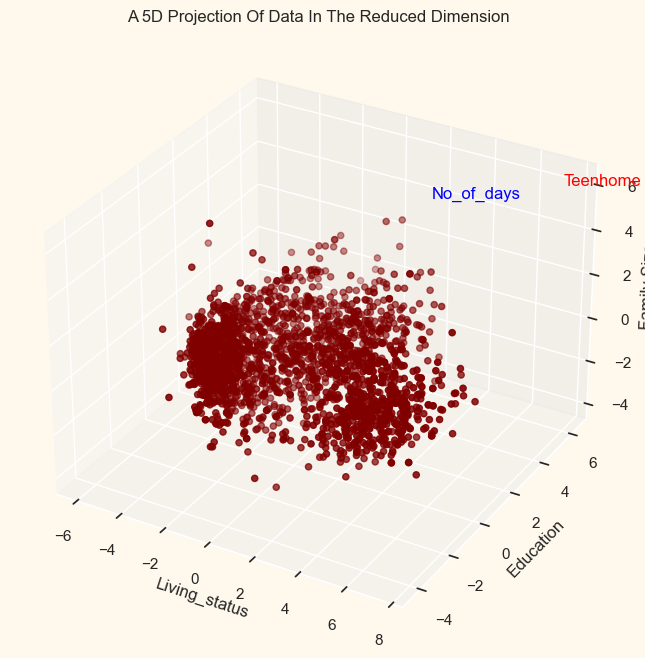

In [248]:
# Assuming you have two additional columns Teenhome and No_of_days in your PCA_ds DataFrame
x = PCA_df["Living_status"]
y = PCA_df["Education"]
z = PCA_df["Family Size"]
# Add two more dimensions
u = PCA_df["Teenhome"]
v = PCA_df["No_of_days"]

# To plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x, y, z, c="maroon", marker="o")
ax.set_title("A 5D Projection Of Data In The Reduced Dimension")
ax.set_xlabel("Living_status")
ax.set_ylabel("Education")
ax.set_zlabel("Family Size")
# Add Teenhome and No_of_days as additional axes labels
ax.text(x.max(), y.max(), z.max(), "Teenhome", color="red")
ax.text(u.max(), v.max(), z.max(), "No_of_days", color="blue")
plt.show()


In [249]:
#Clustering

Elbow method to determine the number of cluster to be used:


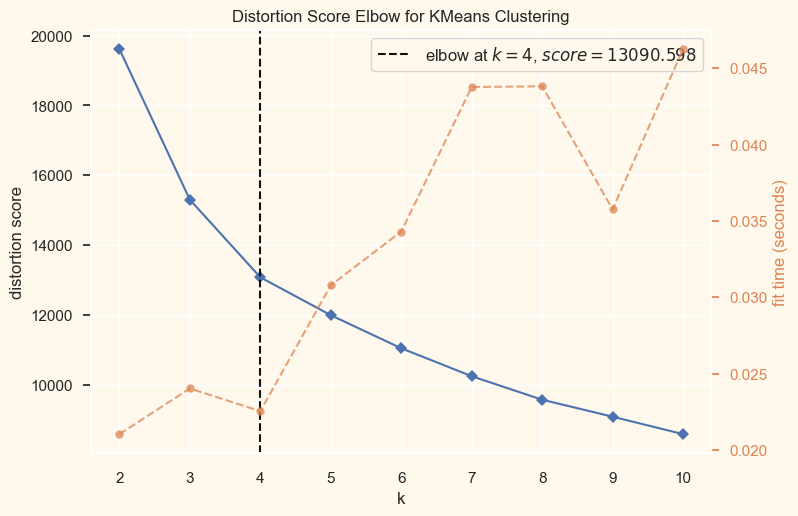

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [250]:
print("Elbow method to determine the number of cluster to be used:")
elb = KElbowVisualizer(KMeans(),k =10)
elb.fit(PCA_df)
elb.show()

In [251]:
# The above cell indicates that four will be an optimal number of clusters for this data. Next, we will be fitting the Agglomerative Clustering Model 
# to get the final clusters.

In [252]:
AC = AgglomerativeClustering(n_clusters=4)
yhat_AC= AC.fit_predict(PCA_df)
data["Cluster"]=yhat_AC
PCA_df["Cluster"]=yhat_AC

In [253]:
data["Cluster"]

0       2
1       3
2       2
3       1
4       0
       ..
2235    0
2236    3
2237    2
2238    0
2239    3
Name: Cluster, Length: 2212, dtype: int64

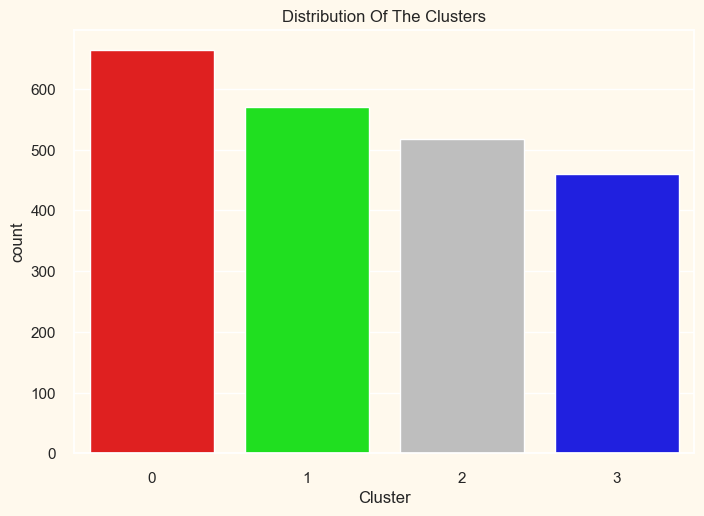

In [254]:
#Plotting countplot of clusters
pal = ["#FF0000","#00FF00", "#BEBEBE","#0000FF"]
pl = sns.countplot(x=data["Cluster"], palette= pal)
pl.set_title("Distribution Of The Clusters")
plt.show()

In [255]:
#The clusters seem to be fairly distributed.

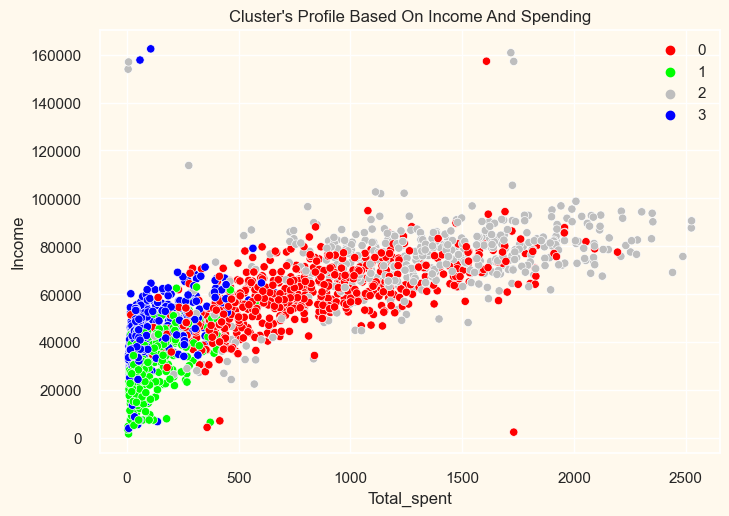

In [256]:
pl = sns.scatterplot(data = data,x=data["Total_spent"], y=data["Income"],hue=data["Cluster"], palette= pal)
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()


In [257]:
# group 0: high spending & average income
# group 1: low spending & low income
# group 2: high spending & high income
# group 3: low spending & high income

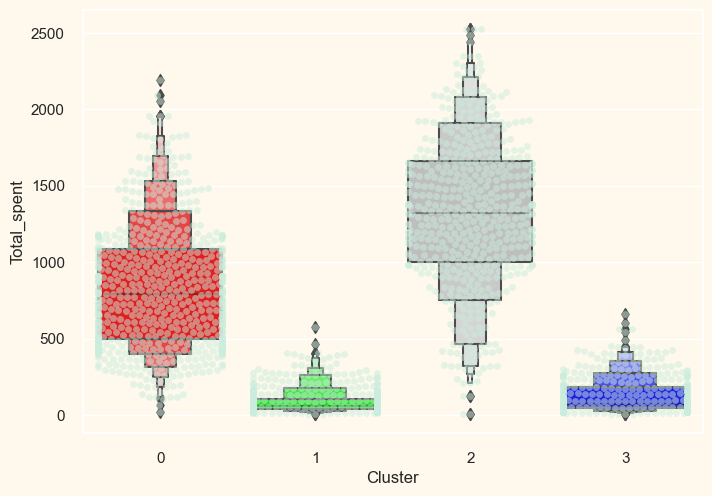

In [258]:
plt.figure()
pl=sns.swarmplot(x=data["Cluster"], y=data["Total_spent"], color= "#CBEDDD", alpha=0.5 )
pl=sns.boxenplot(x=data["Cluster"], y=data["Total_spent"], palette=pal)
plt.show()


In [259]:
# From the above plot, it can be clearly seen that cluster 2 is our biggest set of customers closely followed by cluster 0. We can explore what each
# cluster is spending on for the targeted marketing strategies

In [260]:
# Assuming PCA_df contains the PCA transformed data
X = PCA_df.drop(columns=['Cluster'])  # Exclude the cluster labels for clustering

def divisive_clustering(X, n_clusters):
    kmeans = KMeans(n_clusters=2)
    labels = kmeans.fit_predict(X)
    while len(set(labels)) < n_clusters:
        cluster_to_divide = np.argmax(kmeans.inertia_)
        cluster_mask = labels == cluster_to_divide
        X_cluster = X[cluster_mask]
        kmeans = KMeans(n_clusters=2)
        kmeans.fit(X_cluster)
        new_labels = kmeans.predict(X_cluster)
        new_labels[new_labels == 1] += len(set(labels))
        labels[cluster_mask] = new_labels
    return labels

# Perform divisive clustering
divisive_labels = divisive_clustering(X, n_clusters=4)

# Add divisive cluster labels to PCA_df
PCA_df['Divisive_Cluster'] = divisive_labels

In [261]:
PCA_df['Divisive_Cluster']

0       1
1       3
2       1
3       4
4       3
       ..
2207    1
2208    3
2209    1
2210    1
2211    3
Name: Divisive_Cluster, Length: 2212, dtype: int32

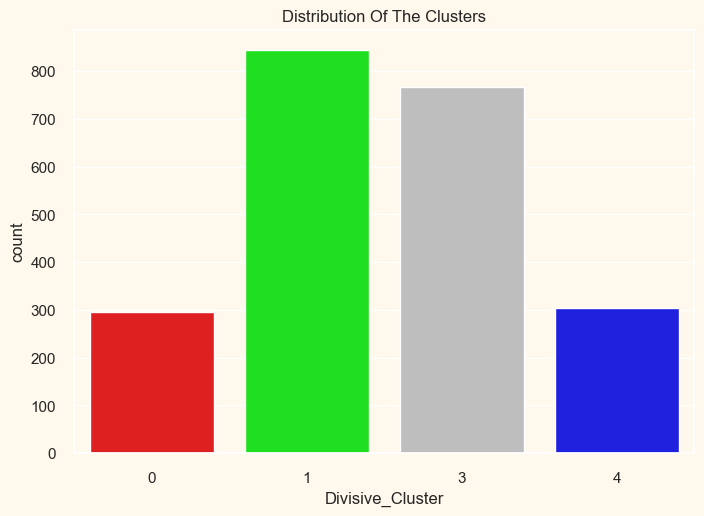

In [262]:
#Plotting countplot of clusters
pal = ["#FF0000","#00FF00", "#BEBEBE","#0000FF"]
pl = sns.countplot(x=PCA_df['Divisive_Cluster'], palette= pal)
pl.set_title("Distribution Of The Clusters")
plt.show()

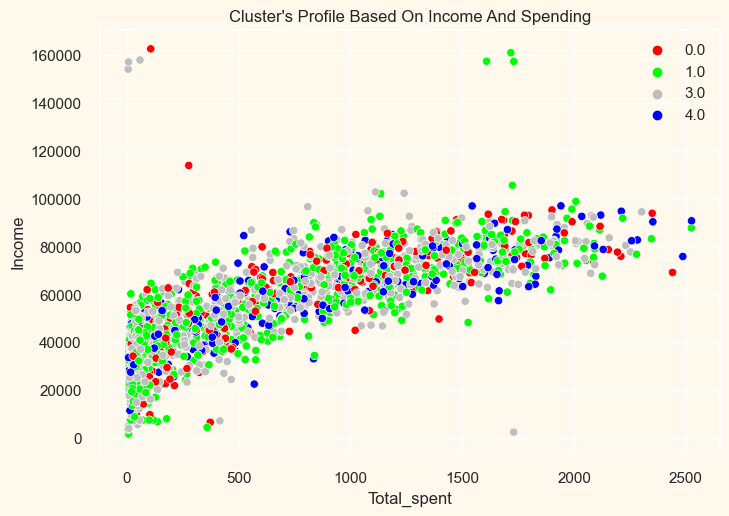

In [263]:
pl = sns.scatterplot(data = data,x=data["Total_spent"], y=data["Income"],hue=PCA_df['Divisive_Cluster'], palette= pal)
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()


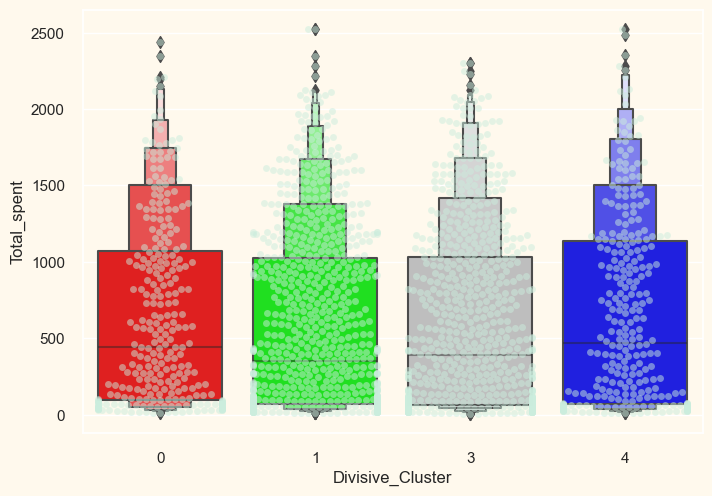

In [264]:
plt.figure()
pl=sns.swarmplot(x=PCA_df['Divisive_Cluster'], y=data["Total_spent"], color= "#CBEDDD", alpha=0.5 )
pl=sns.boxenplot(x=PCA_df['Divisive_Cluster'], y=data["Total_spent"], palette=pal)
plt.show()


In [265]:
# Comparision

from sklearn.metrics import silhouette_score

silhouette_score_agglomerative = silhouette_score(X, yhat_AC)
silhouette_score_divisive = silhouette_score(X, divisive_labels)

print("Silhouette Score (Agglomerative):", silhouette_score_agglomerative)
print("Silhouette Score (Divisive):", silhouette_score_divisive)

Silhouette Score (Agglomerative): 0.252423816232037
Silhouette Score (Divisive): 0.21659318567127633


In [266]:
# The Silhouette Score is a measure of how similar an object is to its own cluster compared to other clusters. It ranges from -1 to 1, where:

# A score close to +1 indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters.
# A score around 0 indicates that the object is on or very close to the decision boundary between two neighboring clusters.
# A score close to -1 indicates that the object may have been assigned to the wrong cluster.

# These scores suggest that, on average, the samples in your dataset are closer to the centroids of their own clusters in the agglomerative clustering 
# case than in the divisive clustering case. 